## 55 - NDBC Latest Data Plotting

[Youtube](https://www.youtube.com/watch?v=SPe8jYOURfc)

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from siphon.simplewebservice.ndbc import NDBC

%matplotlib inline

In [2]:
df = NDBC.latest_observations()
df.head()
df.tail()

,station,latitude,longitude,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,average_wave_period,dominant_wave_direction,pressure,3hr_pressure_tendency,air_temperature,water_temperature,dewpoint,visibility,water_level_above_mean,time
860,WYCM6,30.326,-89.326,180.0,2.1,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.2,NaN,NaN,NaN,2022-10-15 00:18:00+00:00
861,YATA2,59.548,-139.733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.6,NaN,NaN,NaN,2022-10-15 00:18:00+00:00
862,YKRV2,37.251,-76.342,10.0,2.1,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-15 00:18:00+00:00
863,YKTV2,37.227,-76.479,230.0,0.5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.8,NaN,NaN,NaN,2022-10-15 00:18:00+00:00
864,YRSV2,37.414,-76.712,230.0,1.0,NaN,NaN,NaN,NaN,NaN,1016.0,NaN,12.0,NaN,9.4,NaN,NaN,2022-10-14 23:30:00+00:00


In [3]:
df.dropna(subset = ['water_temperature'], inplace = True)

In [4]:
proj = ccrs.LambertConformal(central_latitude = 45, central_longitude = -100, standard_parallels = [30, 60])

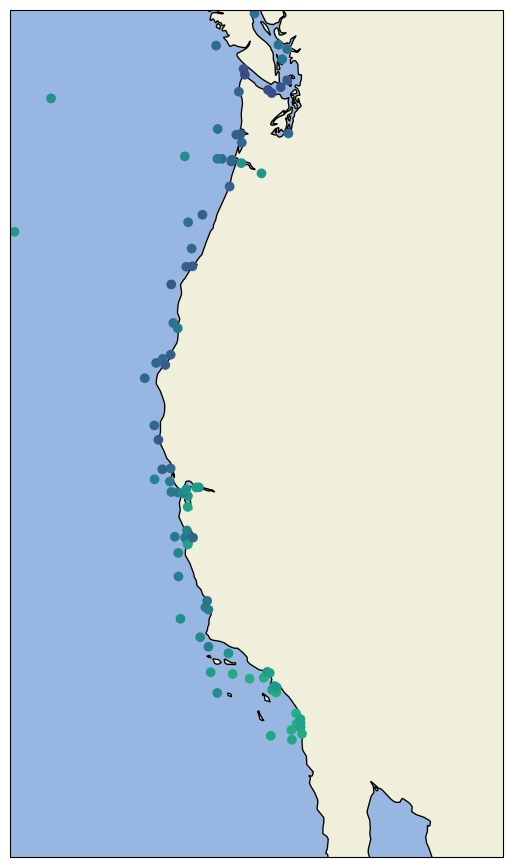

In [5]:
fig = plt.figure(figsize = (17, 11))
ax = plt.axes(projection = proj)
ax.coastlines('50m', edgecolor = 'black')
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.set_extent([-125, -115, 30, 50], ccrs.PlateCarree())

ax.scatter(df['longitude'], df['latitude'], c = df['water_temperature'], transform = ccrs.PlateCarree())